In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\HIT\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load data
df = pd.read_csv(r"C:/Users/HIT/Desktop/jiya 1200 copy.bandgap.csv", encoding='gbk')
df

,ETL,ETL-2,Perovskite,Perovskite_deposition_procedure,Perovskite_deposition_method,Antisolvent,Precursor_solution,HTL,HTL_additive,Year,...,Feature-192,Feature-193,Feature-194,Feature-195,Feature-196,Feature-197,Feature-198,Feature-199,Feature-200,bandgap
0,BCP,PCBM,Cs0.17FA0.83Pb(I0.77Br0.23)3,one-step,spin,diethylether,DMF+DMSO,NiO,0,2023,...,-7.623,23.127,-22.257,19.307,-22.870,-12.348,6.415,-12.622,-11.785,10.04
1,BCP,PCBM,Cs0.17FA0.83Pb(I0.77Br0.23)3,one-step,spin,diethylether,DMF+DMSO,NiO,0,2023,...,-17.748,6.635,-9.508,24.463,-4.767,-19.321,-28.990,-13.414,-25.157,10.04
2,BCP,PCBM,Cs0.17FA0.83Pb(I0.77Br0.23)3,one-step,spin,diethylether,DMF+DMSO,NiO,0,2023,...,23.023,-10.111,15.420,-13.825,2.773,-3.590,13.021,-4.367,-16.765,10.04
3,c-TiO2,mp-TiO2,MA0.13FA0.87PbI2.61Br0.39,one-step,spin2-3,chlorobenzene,DMF+DMSO,Spiro-OMeTAD,Li+TBP,2023,...,19.816,-12.617,-4.760,-24.102,9.726,-18.724,11.545,25.095,-27.380,12.10
4,c-TiO2,mp-TiO2,MA0.13FA0.87PbI2.61Br0.39,one-step,spin2-3,chlorobenzene,DMF+DMSO,Spiro-OMeTAD,Li+TBP,2023,...,24.226,15.047,26.722,5.167,-10.152,22.471,21.308,2.045,20.899,12.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,TiO2,0,MAPbI3,two-step,vasp,no,DMF,spiro-OMeTAD,Li+TBP,2015,...,-29.568,5.465,-22.175,14.824,-29.591,1.530,12.045,13.683,-6.546,7.40
1204,TiO2,mTiO2-Li,MAPbI3,one-step,spin2-3,no,GBL,PTAA,Li+TBP,2015,...,-21.122,8.549,14.371,1.021,-19.259,29.640,-23.935,-8.474,-0.791,7.40
1205,SnO2,0,MAPbI3,two-step,spin2-3-dip,no,DMF,spiro-OMeTAD,Li+TBP+FK102,2015,...,-29.251,17.042,-5.919,-17.194,18.814,7.005,-5.217,-11.191,-23.406,7.40
1206,TiO2,mTiO2,MAPbI3,two-step,spin,no,DMF+DMSO,spiro-OMeTAD,Li+TBP,2015,...,-14.091,-1.662,-2.065,3.767,14.802,-22.396,-1.137,8.132,-2.774,7.40


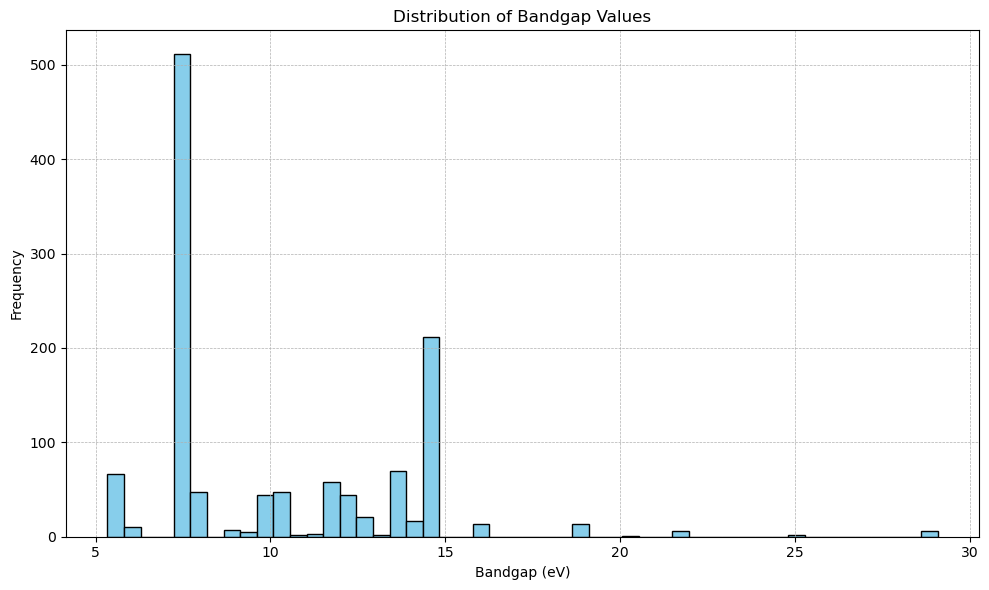

In [5]:
df = df.fillna(0)
df# Plotting the distribution of the bandgap values
plt.figure(figsize=(10, 6))
plt.hist(df['bandgap'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Bandgap Values')
plt.xlabel('Bandgap (eV)')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [6]:

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df.drop('bandgap', axis=1), df['bandgap'], test_size=0.2, random_state=42)

In [7]:

# Grouping and mean calculation
col_groupby = df.columns.to_list()
col_groupby.remove('Year')
col_groupby.remove('PCEbest')
data_grouped = df.groupby(col_groupby).mean().reset_index()

C:\Users\HIT\AppData\Local\Temp\ipykernel_24480\733161394.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_grouped = df.groupby(col_groupby).mean().reset_index()
C:\Users\HIT\AppData\Local\Temp\ipykernel_24480\733161394.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_grouped = df.groupby(col_groupby).mean().reset_index()
C:\Users\HIT\AppData\Local\Temp\ipykernel_24480\733161394.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

In [10]:
# Extracting the predictor variables
predictor_cols = [col for col in data_grouped.columns if col not in ['bandgap', 'Year', 'PCEbest']]
X = data_grouped[predictor_cols]
y = data_grouped['bandgap']

In [11]:
# Identify categorical columns and one-hot encode
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [12]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Define models with hyperparameters
adaboost_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)
gbdt_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=0)

In [14]:
# Fit the models
adaboost_model.fit(X_train, y_train)
gbdt_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)

In [15]:
# Predict on the test set
y_pred_adaboost = adaboost_model.predict(X_test)
y_pred_gbdt = gbdt_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)
y_pred_catboost = catboost_model.predict(X_test)

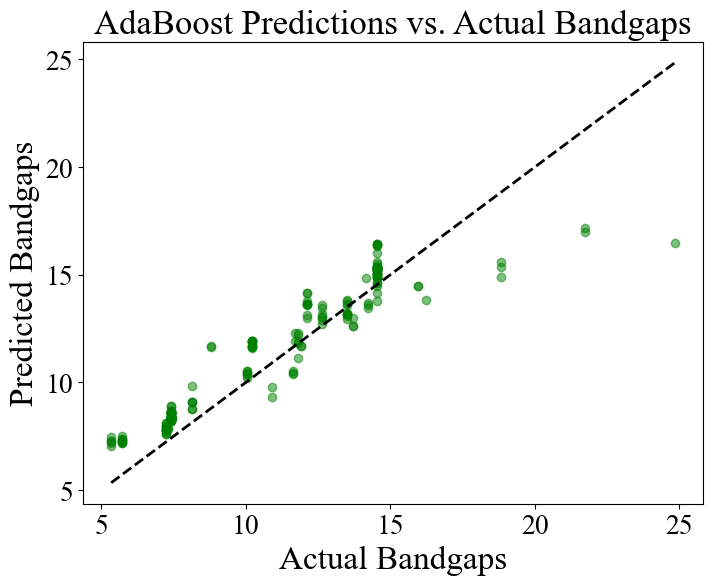

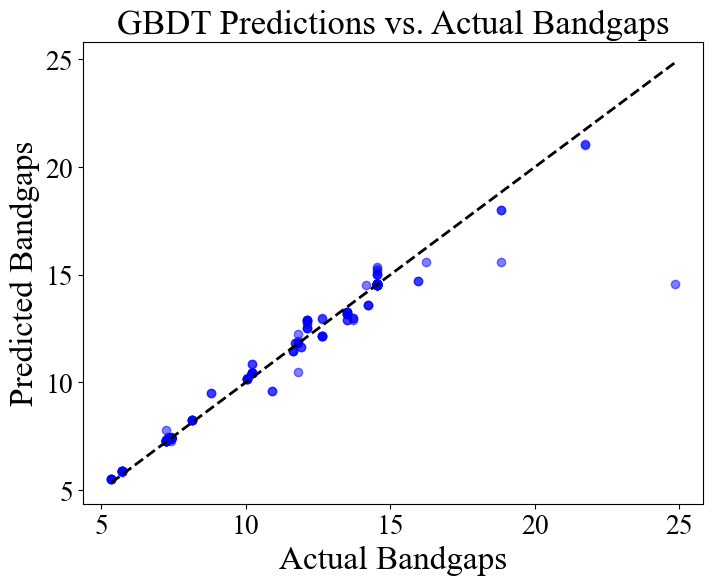

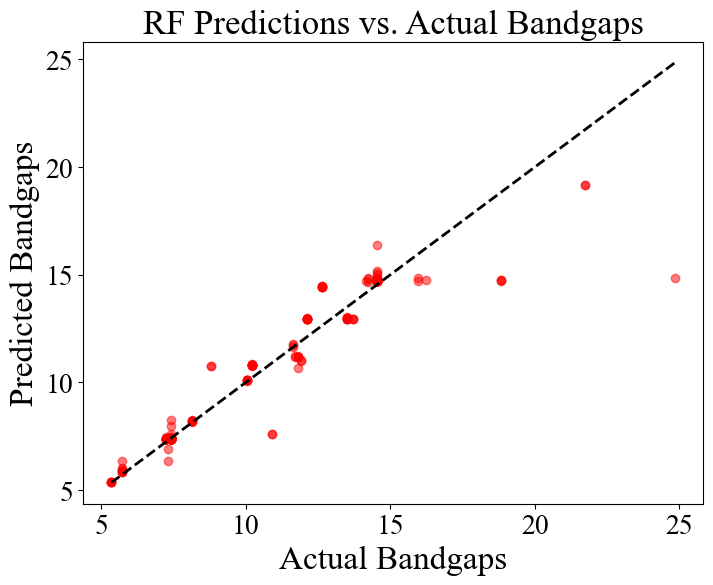

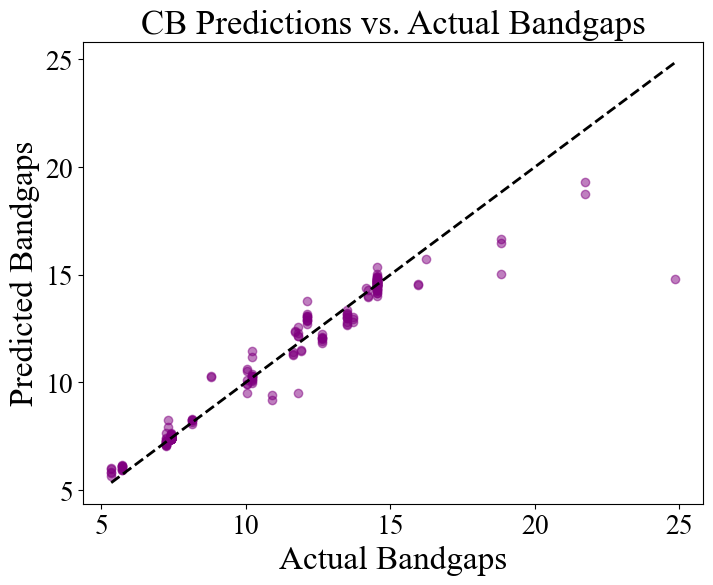

In [26]:

import matplotlib.pyplot as plt

# Set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Function to plot predictions vs actual values for a model with larger font sizes
def plot_predictions(y_test, y_pred, model_name, color):
    fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')  # Set figure background to white
    
    # Scatter plot
    ax.scatter(y_test, y_pred, color=color, alpha=0.5)
    
    # Diagonal line for reference
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    
    # Set labels and title with specified font properties
    ax.set_xlabel('Actual Bandgaps', fontdict={'fontsize': 24, 'family': 'Times New Roman'})
    ax.set_ylabel('Predicted Bandgaps', fontdict={'fontsize': 24, 'family': 'Times New Roman'})
    ax.set_title(f'{model_name} Predictions vs. Actual Bandgaps', fontdict={'fontsize': 25, 'family': 'Times New Roman'})

    # Remove grid
    ax.grid(False)
     # Increase font size of ticks
    ax.tick_params(axis='both', labelsize=20)  # Change the number 20 to your desired font size
    

    # Set axes background to white
    ax.set_facecolor('white')

    # Show the plot
    plt.show()

# Assuming y_test, y_pred_adaboost, y_pred_gbdt, y_pred_random_forest, y_pred_catboost are already defined
# Plot predictions vs actual values for each model
plot_predictions(y_test, y_pred_adaboost, 'AdaBoost', 'green')
plot_predictions(y_test, y_pred_gbdt, 'GBDT', 'blue')
plot_predictions(y_test, y_pred_random_forest, 'RF', 'red')
plot_predictions(y_test, y_pred_catboost, 'CB', 'purple')

In [60]:
from sklearn.metrics import r2_score, mean_squared_error

# Function to calculate and print performance metrics
def print_metrics(y_test, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - R2: {r2:.4f}, RMSE: {rmse:.4f}')

In [61]:
# Predict on the test set
y_pred_adaboost = adaboost_model.predict(X_test)
y_pred_gbdt = gbdt_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)
y_pred_catboost = catboost_model.predict(X_test)

In [62]:
# Print R2 and RMSE for each model
print_metrics(y_test, y_pred_adaboost, 'AdaBoost')
print_metrics(y_test, y_pred_gbdt, 'Gradient Boosting')
print_metrics(y_test, y_pred_random_forest, 'Random Forest')
print_metrics(y_test, y_pred_catboost, 'CatBoost')  # Make sure to close the string and the function call properly

AdaBoost - R2: 0.8634, RMSE: 1.3243
Gradient Boosting - R2: 0.9538, RMSE: 0.7703
Random Forest - R2: 0.9189, RMSE: 1.0202
CatBoost - R2: 0.9386, RMSE: 0.8877


C:\Users\HIT\AppData\Local\Temp\ipykernel_2312\1387183132.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_grouped = data.groupby(col_groupby).mean().reset_index()
C:\Users\HIT\AppData\Local\Temp\ipykernel_2312\1387183132.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_grouped = data.groupby(col_groupby).mean().reset_index()
C:\Users\HIT\AppData\Local\Temp\ipykernel_2312\1387183132.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

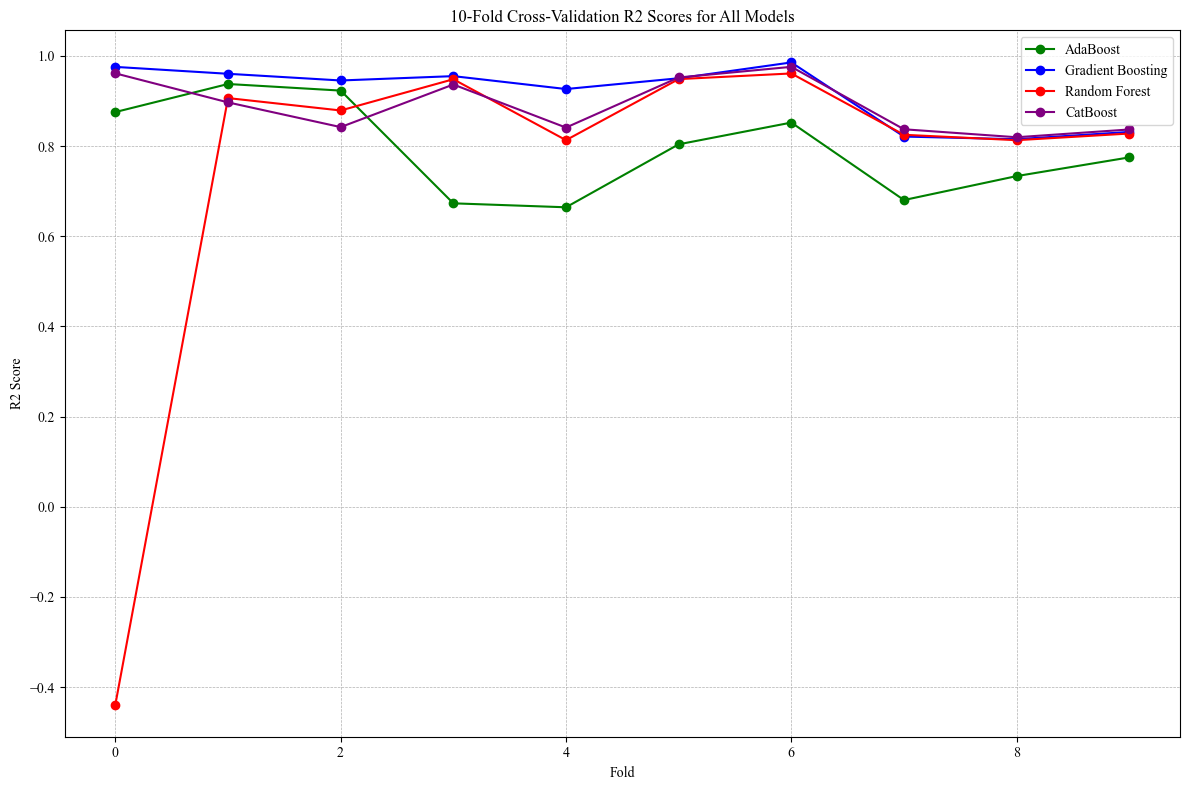

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data = pd.read_csv(r"C:/Users/HIT/Desktop/jiya 1200 copy.bandgap.csv", encoding='gbk')

# Preprocess data
data = data.fillna(0)
col_groupby = data.columns.to_list()
col_groupby.remove('Year')
col_groupby.remove('PCEbest')
data_grouped = data.groupby(col_groupby).mean().reset_index()

# Extracting the predictor variables
predictor_cols = [col for col in data_grouped.columns if col not in ['bandgap', 'Year', 'PCEbest']]
X = data_grouped[predictor_cols]
y = data_grouped['bandgap']

# Identify categorical columns and one-hot encode
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Define models
adaboost_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)
gbdt_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=0)

# Perform 10-fold cross-validation
adaboost_scores = cross_val_score(adaboost_model, X, y, cv=10, scoring='r2')
gbdt_scores = cross_val_score(gbdt_model, X, y, cv=10, scoring='r2')
random_forest_scores = cross_val_score(random_forest_model, X, y, cv=10, scoring='r2')
catboost_scores = cross_val_score(catboost_model, X, y, cv=10, scoring='r2')

# Function to plot cross-validation results for all models in one plot
def plot_cross_validation_results(scores_list, models, colors):
    plt.figure(figsize=(12, 8))
    for scores, model_name, color in zip(scores_list, models, colors):
        plt.plot(scores, marker='o', label=model_name, color=color)
    plt.title('10-Fold Cross-Validation R2 Scores for All Models')
    plt.xlabel('Fold')
    plt.ylabel('R2 Score')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot cross-validation results for all models in one plot
models = ['AdaBoost', 'Gradient Boosting', 'Random Forest', 'CatBoost']
colors = ['green', 'blue', 'red', 'purple']
scores_list = [adaboost_scores, gbdt_scores, random_forest_scores, catboost_scores]
plot_cross_validation_results(scores_list, models, colors)